In [47]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import tensorflow as tf
import random
import os
import matplotlib.pyplot as plt
import seaborn as sns 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, ReLU
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import warnings

plt.rcParams['font.size'] = 14

In [48]:
batch_size = 32
img_size = 224
directory = 'Data'

datagen = ImageDataGenerator(rescale = 1/255.,
                            zoom_range = 0.2,
                            horizontal_flip = True,
                            validation_split = 0.15)

train_generator = datagen.flow_from_directory(directory,
                                             target_size = (img_size, img_size),
                                             batch_size = batch_size,
                                             shuffle=True,
                                             subset='training',
                                             class_mode = 'categorical')

validation_generator = datagen.flow_from_directory(directory,
                                             target_size = (img_size, img_size),
                                             batch_size = batch_size,
                                             shuffle=False,
                                             subset='validation',
                                             class_mode = 'categorical')

Found 22257 images belonging to 10 classes.
Found 3922 images belonging to 10 classes.


In [49]:
[key for key in train_generator.class_indices]

['cane',
 'cavallo',
 'elefante',
 'farfalla',
 'gallina',
 'gatto',
 'mucca',
 'pecora',
 'ragno',
 'scoiattolo']

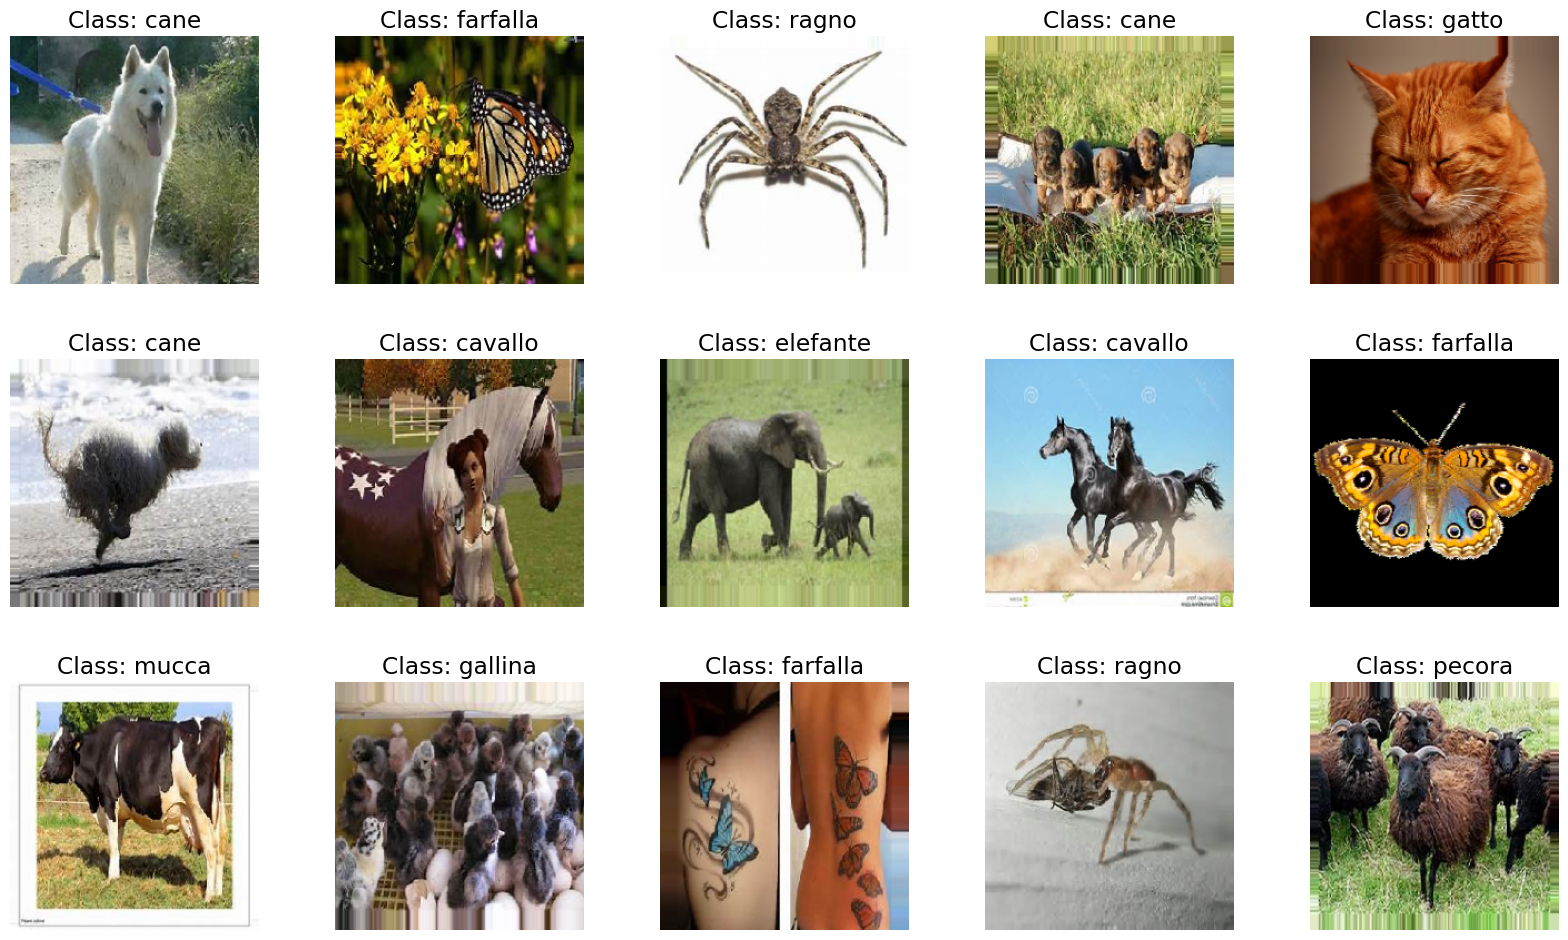

In [50]:
labels = [k for k in train_generator.class_indices]
sample_generate = train_generator.__next__()
images = sample_generate[0]
titles = sample_generate[1]
plt.figure(figsize = (20 , 20))

 

for i in range(15):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[np.argmax(titles[i],axis=0)]}')
    plt.axis("off")

In [51]:
img_size = 224
base_model = VGG16(include_top = False,
                  weights = 'imagenet',
                  input_shape = (img_size, img_size, 3))

In [52]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [53]:
base_model.layers

In [54]:
for layer in base_model.layers[:-4]:
    layer.trainable = False

In [55]:
# base_model.layers
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [56]:
model_name = 'model.h5'
checkpoint = ModelCheckpoint(model_name,
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

earlystopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, restore_best_weights=True)


In [57]:
last_output = base_model.output
x = GlobalAveragePooling2D()(last_output)

x = ReLU()(x)

x = Dense(512, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)
model = Model(inputs=base_model.inputs, outputs=outputs)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [58]:
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator,
                    callbacks=[checkpoint, earlystopping])

Epoch 1/10
696/696 [==============================] - ETA: 0s - loss: 0.6948 - accuracy: 0.7674
Epoch 1: val_loss improved from inf to 0.42577, saving model to model.h5
696/696 [==============================] - 372s 534ms/step - loss: 0.6948 - accuracy: 0.7674 - val_loss: 0.4258 - val_accuracy: 0.8547
Epoch 2/10
696/696 [==============================] - ETA: 0s - loss: 0.3397 - accuracy: 0.8906
Epoch 2: val_loss improved from 0.42577 to 0.39276, saving model to model.h5
696/696 [==============================] - 281s 403ms/step - loss: 0.3397 - accuracy: 0.8906 - val_loss: 0.3928 - val_accuracy: 0.8679
Epoch 3/10
696/696 [==============================] - ETA: 0s - loss: 0.2484 - accuracy: 0.9209
Epoch 3: val_loss improved from 0.39276 to 0.27292, saving model to model.h5
696/696 [==============================] - 253s 364ms/step - loss: 0.2484 - accuracy: 0.9209 - val_loss: 0.2729 - val_accuracy: 0.9082
Epoch 4/10
696/696 [==============================] - ETA: 0s - loss: 0.1949 - a

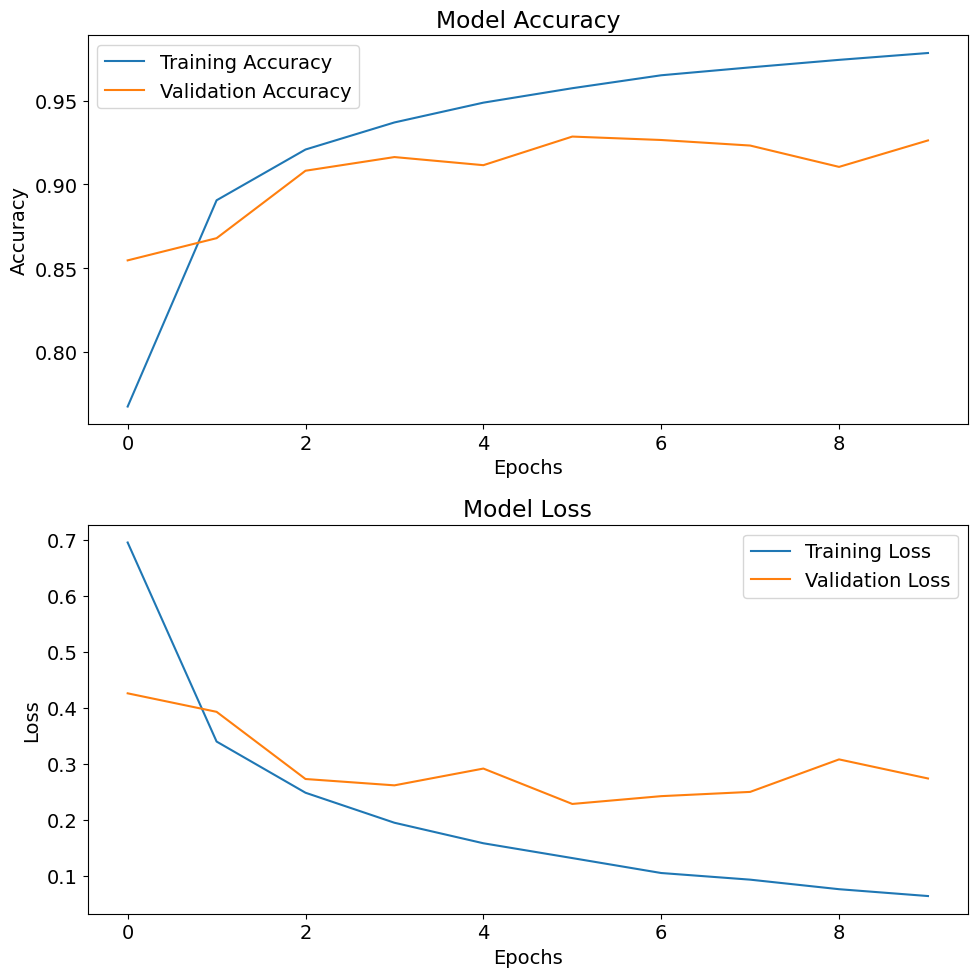

In [59]:


warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(2, 1)
fig.set_size_inches(10, 10)

ax[0].plot(history.history['accuracy'], label='Training Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].plot(history.history['loss'], label='Training Loss')
ax[1].plot(history.history['val_loss'], label='Validation Loss')
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 112ms/step
Selected image: Data/cavallo\OIP-S7X5HHgkVhmJZpIhnoC6ogHaD-.jpeg
Predicted class: cavallo
Real class: cavallo


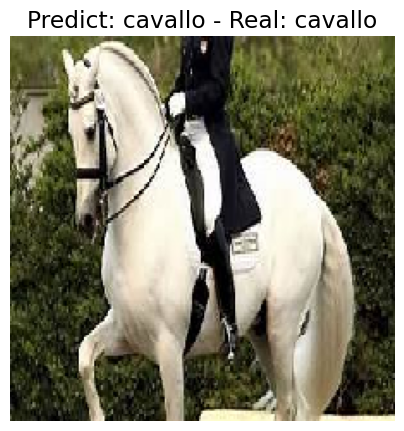

1/1 [==============================] - 0s 21ms/step
Selected image: Data/gatto\243.jpeg
Predicted class: gatto
Real class: gatto


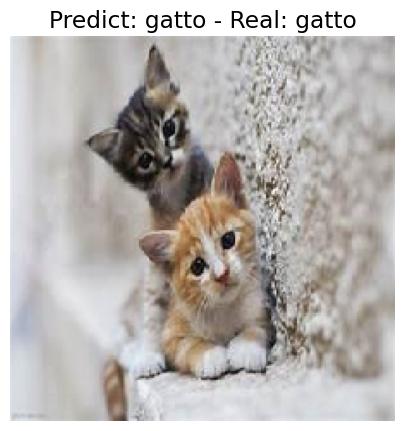

1/1 [==============================] - 0s 19ms/step
Selected image: Data/gallina\OIP-6mq1IP9zqQUkQ0ypsJmgcQHaFj.jpeg
Predicted class: gallina
Real class: gallina


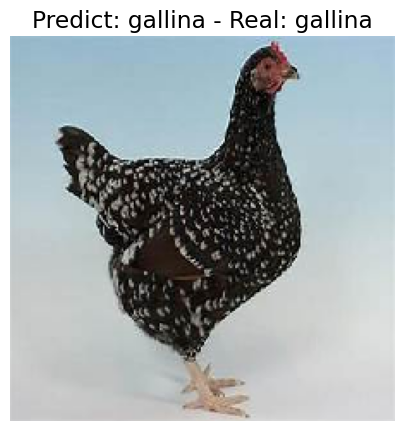

1/1 [==============================] - 0s 26ms/step
Selected image: Data/ragno\OIP-Lo5F9gvgPrp09f8hz2liHAHaKo.jpeg
Predicted class: ragno
Real class: ragno


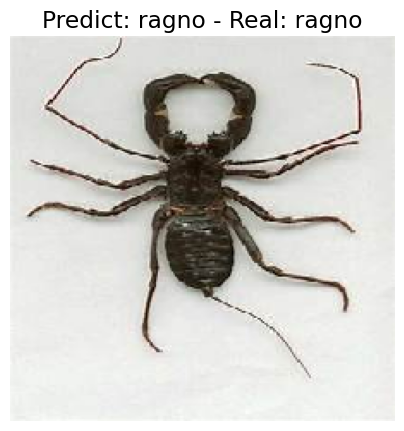

1/1 [==============================] - 0s 20ms/step
Selected image: Data/cavallo\OIP-ZULOBamWiiyImJBVEtFM-wHaFp.jpeg
Predicted class: cavallo
Real class: cavallo


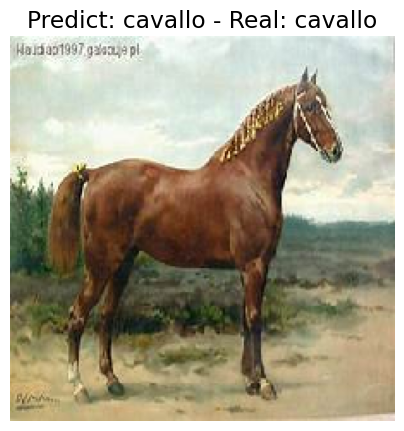

In [64]:

model_path = 'model.h5'
model = tf.keras.models.load_model(model_path)

data_directory = 'Data/'

all_classes = os.listdir(data_directory)
all_images = []

for class_name in all_classes:
    class_folder = os.path.join(data_directory, class_name)
    if os.path.isdir(class_folder):
        all_images += [os.path.join(class_folder, img) for img in os.listdir(class_folder)]

for i in range(5):
    random_image_path = random.choice(all_images)
    true_class_name = os.path.basename(os.path.dirname(random_image_path))
    image = load_img(random_image_path, target_size=(img_size, img_size))
    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0) 
    image_array /= 255.

    predictions = model.predict(image_array)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = all_classes[predicted_class_index]

    print(f"Selected image: {random_image_path}")
    print(f"Predicted class: {predicted_class_name}")
    print(f"Real class: {true_class_name}")

    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.title(f"Predict: {predicted_class_name} - Real: {true_class_name}")
    plt.axis('off')
    plt.show()

